In [36]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [37]:
warnings.filterwarnings('ignore')

# Load Dataset

In [38]:
df = pd.read_csv('/kaggle/input/ford-car-price-prediction/ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


# EDA

In [39]:
df.shape

(17966, 9)

In [40]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [41]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [43]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


# Visualization

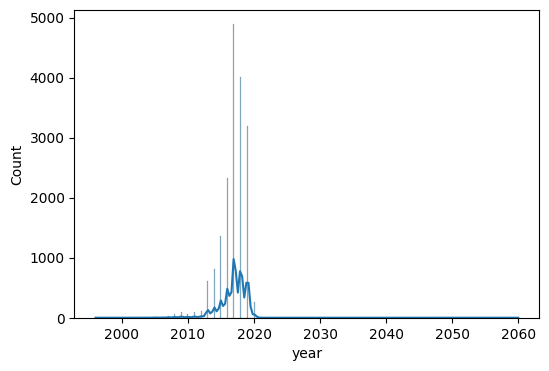

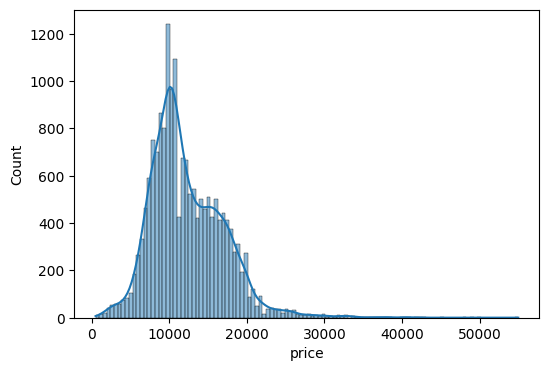

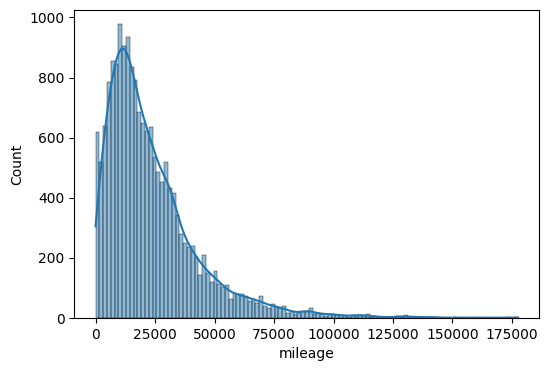

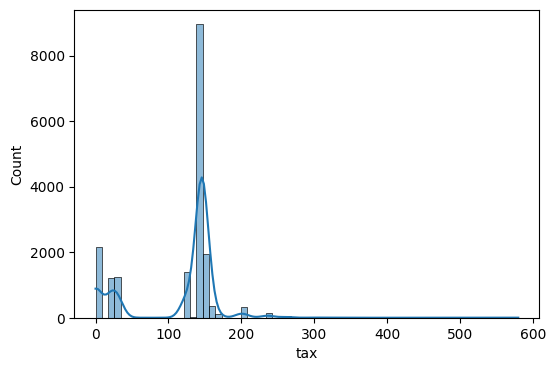

In [44]:
numeric_cols = ['year', 'price', 'mileage', 'tax']
for col in numeric_cols:
    plt.figure(figsize = (6,4))
    sns.histplot(x = df[col], kde = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


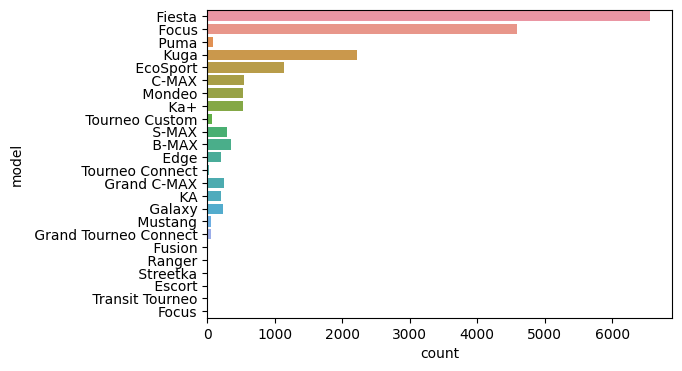

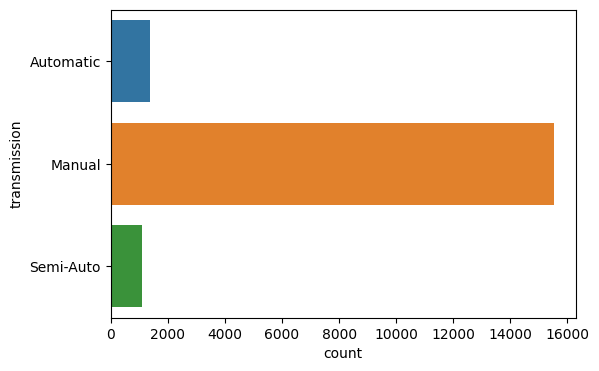

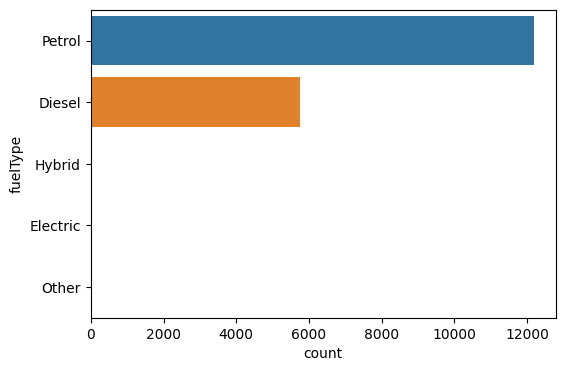

In [46]:
categorical_cols = ['model', 'transmission', 'fuelType']
for col in categorical_cols:
    plt.figure(figsize = (6,4))
    sns.countplot(y = df[col])

<Axes: >

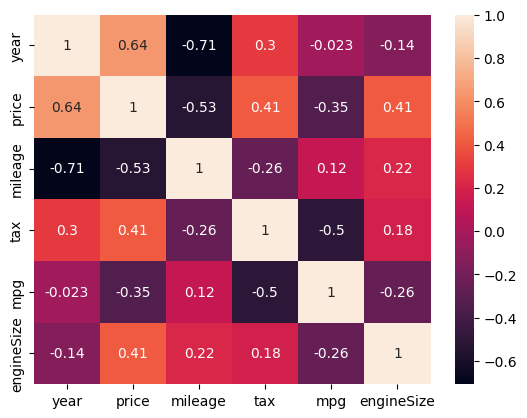

In [60]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

<Axes: xlabel='transmission', ylabel='price'>

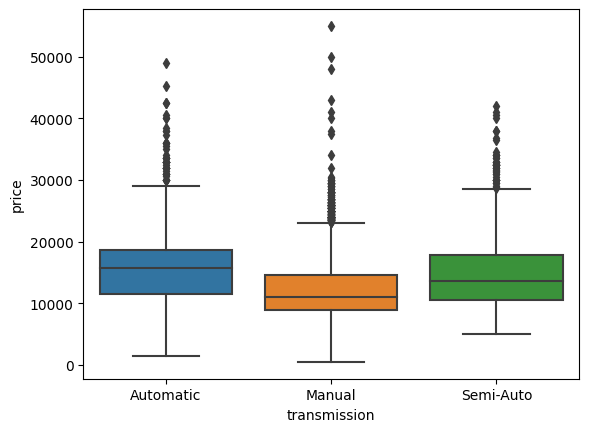

In [61]:
sns.boxplot(data = df, x = 'transmission', y = 'price')

<Axes: xlabel='fuelType', ylabel='price'>

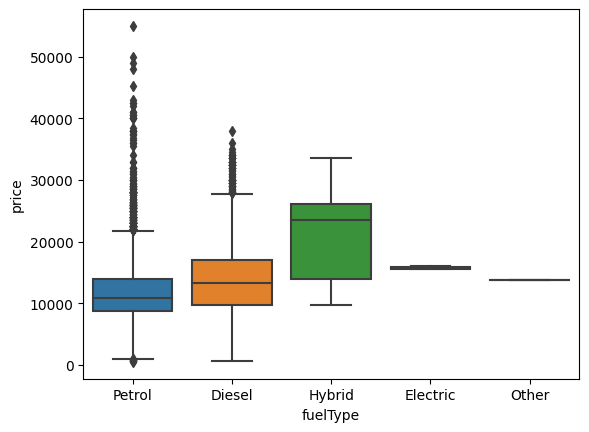

In [62]:
sns.boxplot(data = df, x = 'fuelType', y = 'price')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

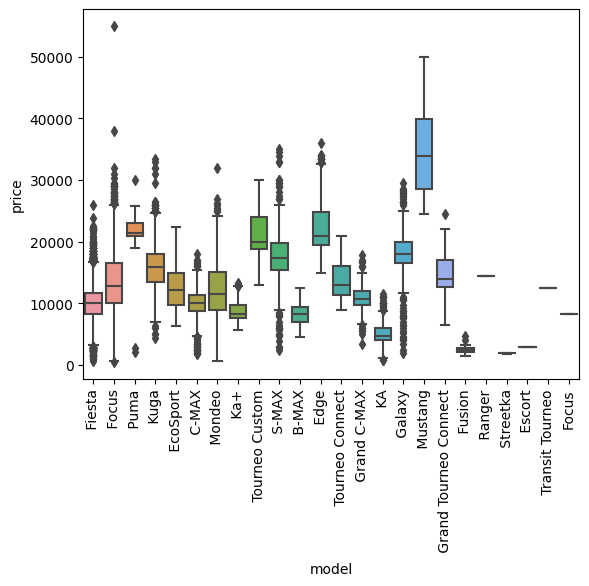

In [65]:
sns.boxplot(data = df, x = 'model', y = 'price')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '0'),
  Text(1, 0, '20'),
  Text(2, 0, '22'),
  Text(3, 0, '30'),
  Text(4, 0, '110'),
  Text(5, 0, '115'),
  Text(6, 0, '120'),
  Text(7, 0, '125'),
  Text(8, 0, '135'),
  Text(9, 0, '140'),
  Text(10, 0, '145'),
  Text(11, 0, '150'),
  Text(12, 0, '155'),
  Text(13, 0, '160'),
  Text(14, 0, '165'),
  Text(15, 0, '185'),
  Text(16, 0, '190'),
  Text(17, 0, '195'),
  Text(18, 0, '200'),
  Text(19, 0, '205'),
  Text(20, 0, '210'),
  Text(21, 0, '220'),
  Text(22, 0, '230'),
  Text(23, 0, '235'),
  Text(24, 0, '240'),
  Text(25, 0, '260'),
  Text(26, 0, '265'),
  Text(27, 0, '270'),
  Text(28, 0, '290'),
  Text(29, 0, '300'),
  Text(30, 0, '305'),
  Text(31, 0, '325'),
  Text(32, 0, '330'),
  Text(33, 0, '555'),
  Text(34, 0, '570'),
  Text(35, 0, '580')])

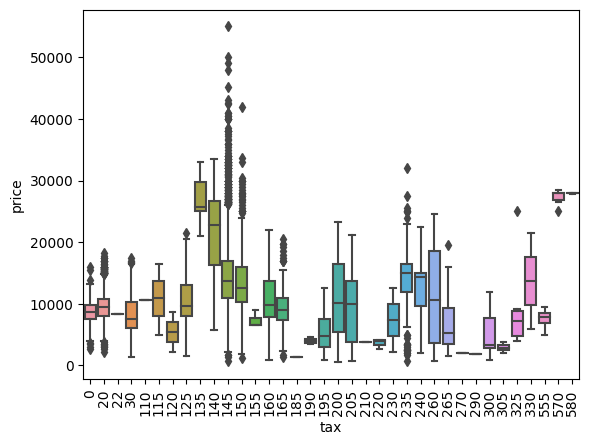

In [68]:
sns.boxplot(data = df, x = 'tax', y = 'price')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 [Text(0, 0, '20.8'),
  Text(1, 0, '20.9'),
  Text(2, 0, '22.1'),
  Text(3, 0, '22.6'),
  Text(4, 0, '22.8'),
  Text(5, 0, '23.5'),
  Text(6, 0, '23.7'),
  Text(7, 0, '23.9'),
  Text(8, 0, '24.8'),
  Text(9, 0, '26.3'),
  Text(10, 0, '27.4'),
  Text(11, 0, '28.0'),
  Text(12, 0, '28.3'),
  Text(13, 0, '28.5'),
  Text(14, 0, '28.8'),
  Text(15, 0, '29.1'),
  Text(16, 0, '29.4'),
  Text(17, 0, '30.1'),
  Text(18, 0, '30.4'),
  Text(19, 0, '30.7'),
  Text(20, 0, '31.0'),
  Text(21, 0, '31.4'),
  Text(22, 0, '31.7'),
  Text(23, 0, '32.1'),
  Text(24, 0, '32.5'),
  Text(25, 0, '32.8'),
  

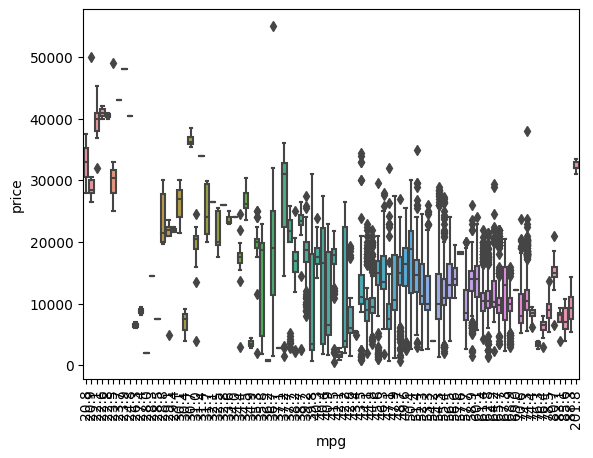

In [69]:
sns.boxplot(data = df, x = 'mpg', y = 'price')
plt.xticks(rotation = 90)

# Data cleaning and preprocess

In [101]:
df_cleaned = df.copy()

In [48]:
df_cleaned.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [49]:
df_cleaned.shape

(17966, 9)

In [50]:
df_cleaned.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [52]:
df_cleaned.shape

(17966, 9)

In [53]:
df_cleaned = df_cleaned.drop_duplicates()

In [54]:
df_cleaned.shape

(17812, 9)

In [55]:
df_cleaned.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [56]:
df['transmission'].value_counts()

transmission
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: count, dtype: int64

In [57]:
df['fuelType'].value_counts()

fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

In [58]:
df['model'].value_counts()

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

In [102]:
df_cleaned.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [103]:
# encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)

In [104]:
cols = ['model', 'transmission', 'fuelType']
df_cleaned = pd.get_dummies(df_cleaned, columns = cols)

In [105]:
df_cleaned = df_cleaned.astype(int)
df_cleaned.head()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,14000,9083,150,57,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,13000,12456,150,57,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,17500,10460,145,40,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,16500,1482,145,48,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [106]:
df_cleaned.shape

(17966, 38)

# Feature Scaling and engineering

In [107]:
df_cleaned.head()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,14000,9083,150,57,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,13000,12456,150,57,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,17500,10460,145,40,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,16500,1482,145,48,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [115]:
scale_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
df_cleaned[scale_cols] = scaler.fit_transform(df[scale_cols])

In [116]:
df_cleaned

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,12000,-0.380998,0.591358,-0.020442,-0.811386,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.552866,14000,-0.733359,0.591358,-0.020442,-0.811386,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.065128,13000,-0.560132,0.591358,-0.020442,-0.811386,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.040605,17500,-0.662640,0.510727,-1.738890,0.345070,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.040605,16500,-1.123724,0.510727,-0.909294,-0.811386,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,8999,-0.342172,0.591358,-1.067312,0.113779,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,-1.398088,7499,0.890398,-1.343791,-0.020442,-0.811386,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,-0.910349,9999,-0.839822,-1.505053,0.927668,0.576362,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,0.552866,8299,-0.942690,0.510727,-0.020442,-0.348804,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [117]:
X = df_cleaned.drop(columns = ['price'], axis = 1)
y = df_cleaned['price']

In [118]:
X.head()

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.020442,-0.811386,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.020442,-0.811386,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.020442,-0.811386,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.738890,0.345070,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.909294,-0.811386,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [119]:
y.head()

0    12000
1    14000
2    13000
3    17500
4    16500
Name: price, dtype: int64

# Model train

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [122]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
y_pred = model.predict(X_test)
y_pred

array([ 6666.16701297,  9183.56005913,  9882.68400551, ...,
        7464.107484  , 11808.93496119,  8813.36936702])

In [125]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
647       4298
8722     10800
3613      6597
17189    10250
10882     8999
Name: price, Length: 5390, dtype: int64

# Model evaluation

In [132]:
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-((1-r2)*n-1)/(n-p-1)

In [133]:
print(f'r2 score: {r2}')
print(f'adjusted r2 score: {adjusted_r2}')

r2 score: 0.8409560048250742
adjusted r2 score: 0.8400136147248037
